<a href="https://www.kaggle.com/code/suditipandey/stock-exchange-data-modelling?scriptVersionId=127727387" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.6 MB/s eta 0:00:00


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-exchange-data/indexProcessed.csv
/kaggle/input/stock-exchange-data/indexData.csv
/kaggle/input/stock-exchange-data/indexInfo.csv


In [3]:
df = pd.read_csv("/kaggle/input/stock-exchange-data/indexProcessed.csv",parse_dates = True, index_col = 'Date')
df_date = pd.read_csv("/kaggle/input/stock-exchange-data/indexProcessed.csv")

In [4]:
index = np.unique(df.Index)
index
company = df['Index'].value_counts().index
company

Index(['NYA', 'N225', 'IXIC', 'GSPTSE', 'HSI', 'GDAXI', 'SSMI', 'TWII',
       '000001.SS', '399001.SZ', 'N100', 'NSEI', 'J203.JO'],
      dtype='object')

In [5]:
df_NYA = pd.DataFrame(df[df.Index == 'NYA'])
df_N225 = pd.DataFrame(df[df.Index == 'N225'])
df_IXIC = pd.DataFrame(df[df.Index == 'IXIC'])
df_GSPTSE = pd.DataFrame(df[df.Index == 'GSPTSE'] )


> # Closing price of First four Companies

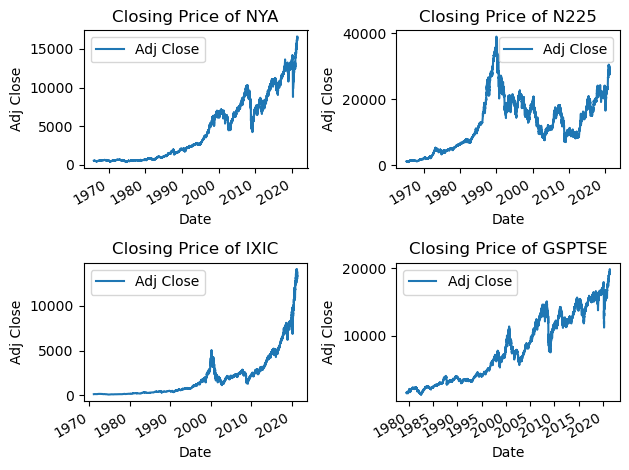

In [6]:


fig , ax = plt.subplots(2, 2,)
df[df.Index == company[0]].plot(None, 'Adj Close',ylabel = 'Adj Close', title = f"Closing Price of {company[0]}", ax = ax[0][0])
df[df.Index == company[1]].plot(None, 'Adj Close',ylabel = 'Adj Close', title = f"Closing Price of {company[1]}", ax = ax[0][1])
df[df.Index == company[2]].plot(None, 'Adj Close',ylabel = 'Adj Close', title = f"Closing Price of {company[2]}", ax = ax[1][0])
df[df.Index == company[3]].plot(None, 'Adj Close',ylabel = 'Adj Close', title = f"Closing Price of {company[3]}", ax = ax[1][1])
plt.tight_layout()

# Calculating Moving Average of the Close Prices
The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. 
Here, the mean is taken over a specific period of time, that is of 12 months.

<AxesSubplot:title={'center':'Simple Moving Average of NYA'}, xlabel='Date'>

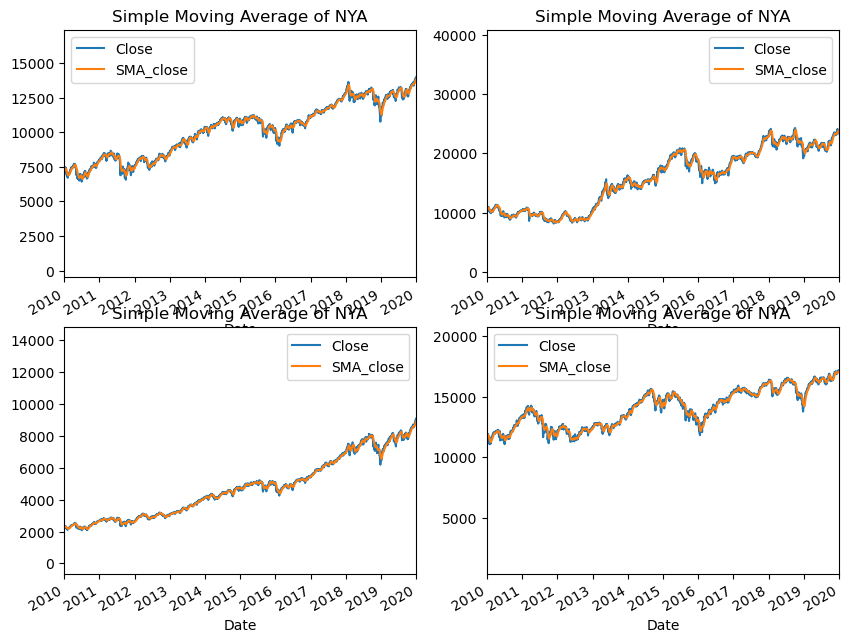

In [7]:
fig, ax = plt.subplots(2,2)
df_NYA['SMA_close']= df_NYA['Close'].rolling(window = 12, min_periods = 1).mean()
df_N225['SMA_close']= df_N225['Close'].rolling(window = 12, min_periods = 1).mean()
df_IXIC['SMA_close']= df_IXIC['Close'].rolling(window = 12, min_periods = 1).mean()
df_GSPTSE['SMA_close']= df_GSPTSE['Close'].rolling(window = 12, min_periods = 1).mean()
df_NYA[['Close', 'SMA_close']].plot(xlim = ['2010-01-01','2020-01-01'],title = 'Simple Moving Average of NYA', ax = ax[0][0],figsize = (10,8))
df_N225[['Close', 'SMA_close']].plot(xlim = ['2010-01-01','2020-01-01'],title = 'Simple Moving Average of NYA', ax = ax[0][1],figsize = (10,8))
df_IXIC[['Close', 'SMA_close']].plot(xlim = ['2010-01-01','2020-01-01'],title = 'Simple Moving Average of NYA', ax = ax[1][0],figsize = (10,8))
df_GSPTSE[['Close', 'SMA_close']].plot(xlim = ['2010-01-01','2020-01-01'],title = 'Simple Moving Average of NYA', ax = ax[1][1],figsize = (10,8))

# Exponential Moving Average of the stocks
Here, from the plotting of NYA we can conclude that smoothening factor for the value of 0.3 gives better smoothening by decreasing the gaps than that for the value of 0.1 

<AxesSubplot:title={'center':'Exponential Moving Average of GSPTSE'}, xlabel='Date'>

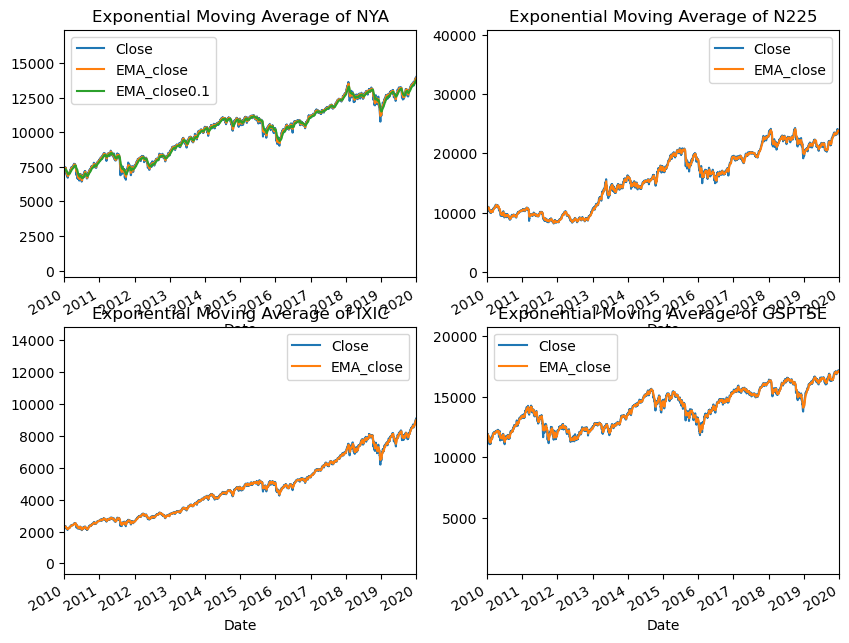

In [8]:
fig, ax = plt.subplots(2,2)
df_NYA['EMA_close']= df_NYA['Close'].ewm(alpha = 0.3, adjust = False).mean()
df_NYA['EMA_close0.1']= df_NYA['Close'].ewm(alpha = 0.1, adjust = False).mean()
df_N225['EMA_close']= df_N225['Close'].ewm(alpha = 0.3, adjust = False).mean()
df_IXIC['EMA_close']= df_IXIC['Close'].ewm(alpha = 0.3, adjust = False).mean()
df_GSPTSE['EMA_close']= df_GSPTSE['Close'].ewm(alpha = 0.3, adjust = False).mean()
df_NYA[['Close', 'EMA_close','EMA_close0.1']].plot(xlim = ['2010-01-01','2020-01-01'],title = 'Exponential Moving Average of NYA', ax = ax[0][0],figsize = (10,8))
df_N225[['Close', 'EMA_close']].plot(xlim = ['2010-01-01','2020-01-01'],title = 'Exponential Moving Average of N225', ax = ax[0][1],figsize = (10,8))
df_IXIC[['Close', 'EMA_close']].plot(xlim = ['2010-01-01','2020-01-01'],title = 'Exponential Moving Average of IXIC', ax = ax[1][0],figsize = (10,8))
df_GSPTSE[['Close', 'EMA_close']].plot(xlim = ['2010-01-01','2020-01-01'],title = 'Exponential Moving Average of GSPTSE', ax = ax[1][1],figsize = (10,8))

# Daily Return of the Stack on Average

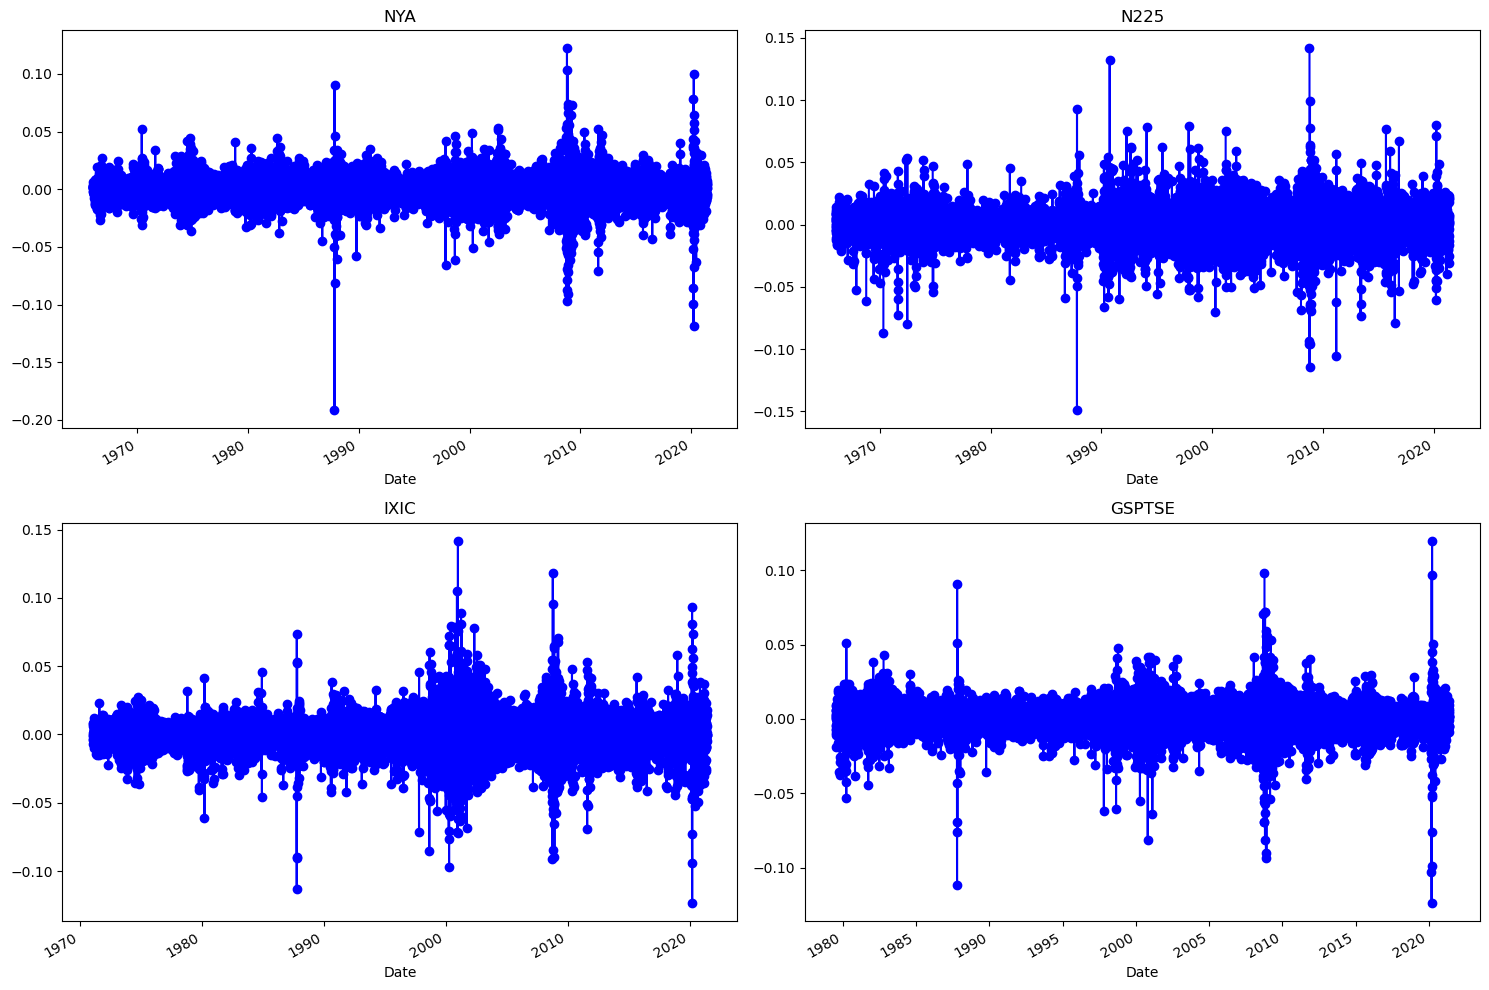

In [9]:
fig, ax = plt.subplots(2,2)
d_return = pd.DataFrame()
for comp in company[:4]:
    d_return[comp] = df[df.Index == comp]['Adj Close'].pct_change()
fig.set_figheight(10)
fig.set_figwidth(15)
d_return[company[0]].plot(color="blue",title = company[0],ax = ax[0][0], marker = 'o')
d_return[company[1]].plot(color="blue",title = company[1],ax = ax[0][1], marker = 'o')
d_return[company[2]].plot(color="blue",title = company[2],ax = ax[1][0], marker = 'o')
d_return[company[3]].plot(color="blue",title = company[3],ax = ax[1][1], marker = 'o')
plt.tight_layout()

In [10]:
from statsmodels.tsa.stattools import adfuller
def adftest(series):
    result = adfuller(series)
    print("ADF Statistics: ",result[0])
    print("p-value: ", result[1])
    print("No. of lags used: ",result[2])
    if(result[1] <= 0):
        print("Unit root is rejected and the data is stationary.")
    else:
        print("The data is not stationary.")

In [11]:
adftest(df_NYA['Close'])
adftest(df_N225['Close'])
adftest(df_IXIC['Close'])
adftest(df_GSPTSE['Close'])

ADF Statistics:  1.2871554256789384
p-value:  0.9965360410353249
No. of lags used:  40
The data is not stationary.
ADF Statistics:  -1.240074015759403
p-value:  0.6561238080578635
No. of lags used:  38
The data is not stationary.
ADF Statistics:  5.226063217091629
p-value:  1.0
No. of lags used:  41
The data is not stationary.
ADF Statistics:  -0.05556403824309783
p-value:  0.9536885714757379
No. of lags used:  39
The data is not stationary.


From Dickey Fuller test we get that the data is not stationary, So, we need to apply differencing to the dataset.

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_NYA_log = np.log(df_NYA['Close'])
df_diff_NYA = df_NYA_log.diff().dropna()
adftest(df_diff_NYA)
df_N225_log = np.log(df_N225['Close'])
df_diff_N225 = df_N225_log.diff().dropna()
adftest(df_diff_N225)
df_IXIC_log = np.log(df_IXIC['Close'])
df_diff_IXIC = df_IXIC_log.diff().dropna()
adftest(df_diff_IXIC)
df_GSPTSE_log = np.log(df_GSPTSE['Close'])
df_diff_GSPTSE = df_GSPTSE_log.diff().dropna()
adftest(df_diff_GSPTSE)
#plt.legend(loc='best')
#plt.title('Moving Average')
#plt.plot(std_dev, color ="black", label = "Standard Deviation")
#plt.plot(moving_avg, color="red", label = "Mean")
#plt.legend()
#plt.show()


ADF Statistics:  -20.34511820234964
p-value:  0.0
No. of lags used:  33
Unit root is rejected and the data is stationary.
ADF Statistics:  -22.935537318629173
p-value:  0.0
No. of lags used:  25
Unit root is rejected and the data is stationary.
ADF Statistics:  -17.114168458583286
p-value:  7.330957745578463e-30
No. of lags used:  41
The data is not stationary.
ADF Statistics:  -18.238608858294615
p-value:  2.357883584792206e-30
No. of lags used:  29
The data is not stationary.


After transforming the data we get that for NYA and N225 company index unit root get rejected and the data is now stationary but for the companies IXIC and GSPTSE still the data is non-stationary.So, again we can transform the data.

In [13]:
df_IXIC_log2 = np.sqrt(df_diff_IXIC)
df_diff_IXIC2 = df_IXIC_log2.diff().dropna()
adftest(df_diff_IXIC2)
df_GSPTSE_log2 = np.sqrt(df_diff_GSPTSE)
df_diff_GSPTSE2 = df_GSPTSE_log2.diff().dropna()
adftest(df_diff_GSPTSE2)

ADF Statistics:  -59.22126931078076
p-value:  0.0
No. of lags used:  1
Unit root is rejected and the data is stationary.
ADF Statistics:  -53.04379817833099
p-value:  0.0
No. of lags used:  1
Unit root is rejected and the data is stationary.


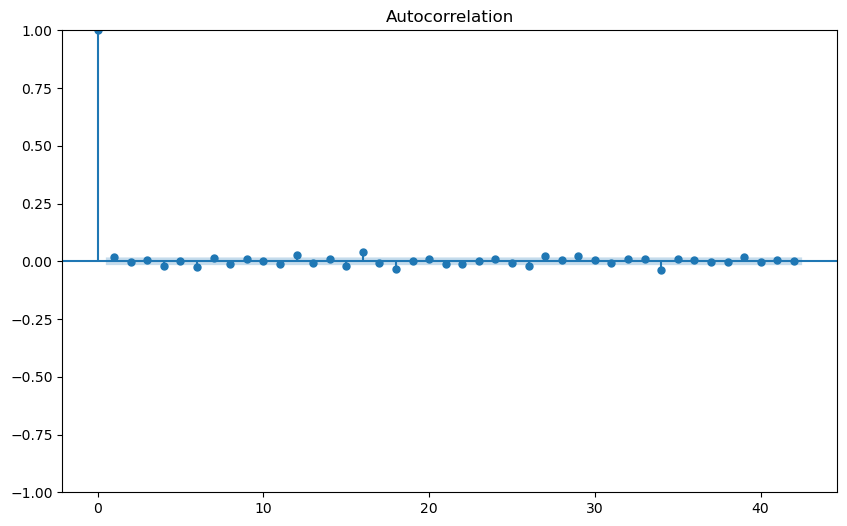

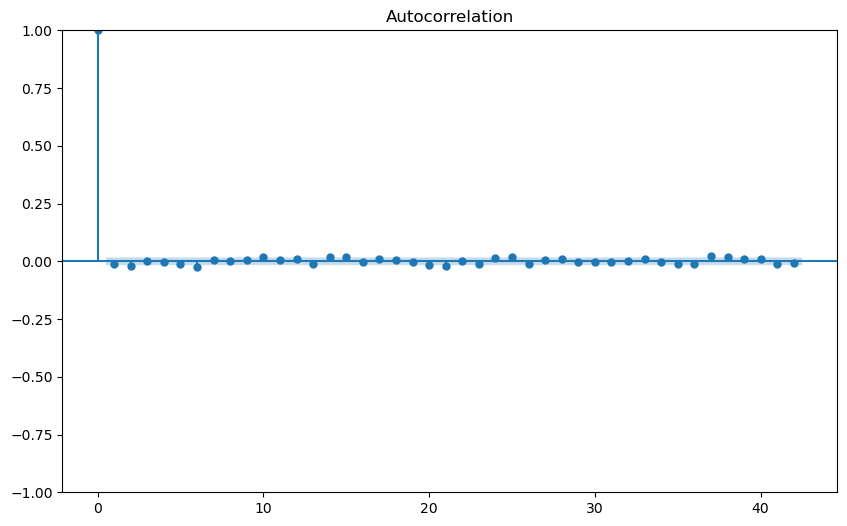

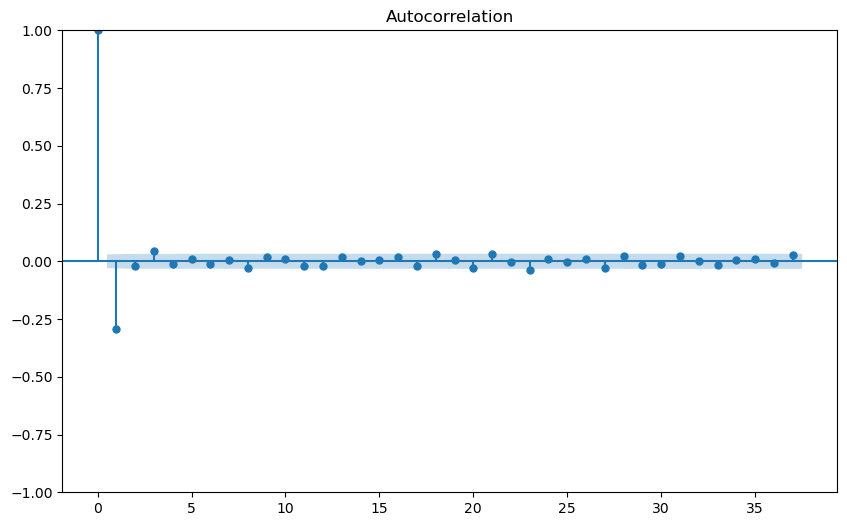

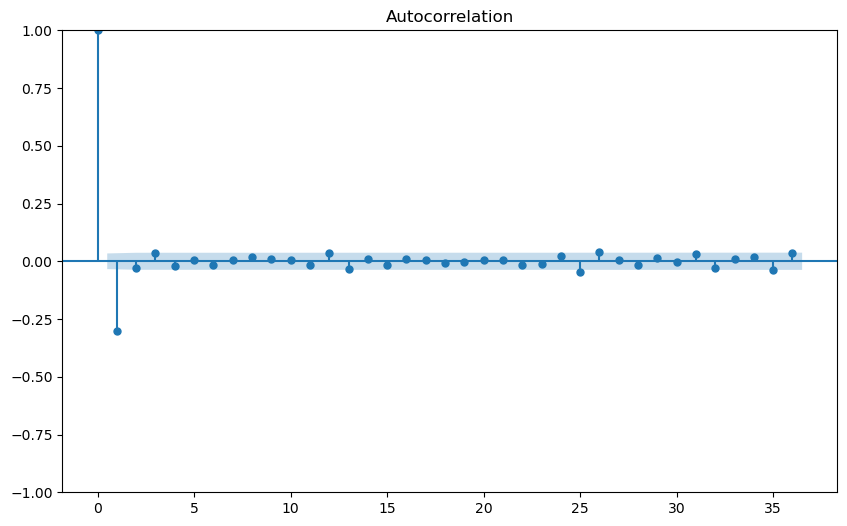

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_NYA = plot_acf(df_diff_NYA.dropna())
acf_N225 = plot_acf(df_diff_N225.dropna())
acf_IXIC = plot_acf(df_diff_IXIC2.dropna())
acf_GSPTSE = plot_acf(df_diff_GSPTSE2.dropna())

From above AutoCorrelation Function Plotting we can conclude that the value of p can range from 2-4 for the companies

# Stock Prediction for NYA company using ARIMA Model

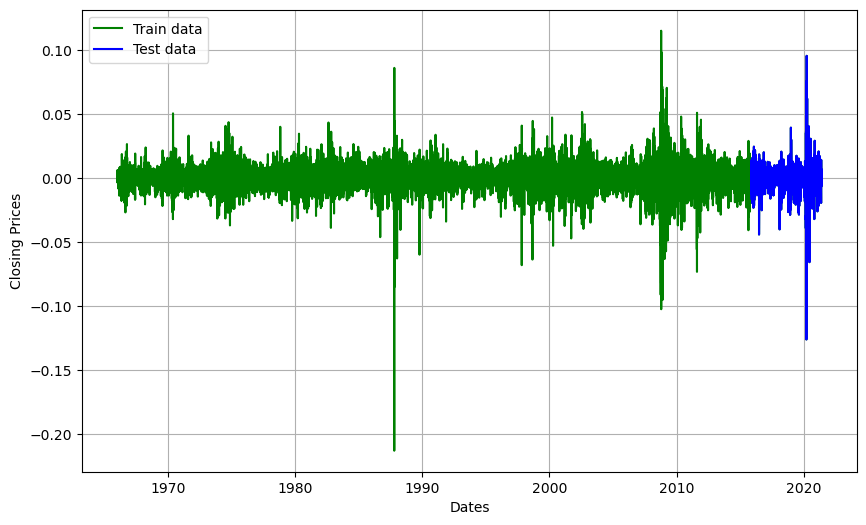

In [15]:
train_data, test_data = df_diff_NYA[0:int(len(df_diff_NYA)*0.9)], df_diff_NYA[int(len(df_diff_NYA)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_diff_NYA, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

**Finding best parameter values(p, q, d) for the ARIMA model using auto_ARIMA** 

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-79674.074, Time=0.58 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-79700.461, Time=0.44 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-79702.388, Time=0.88 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-79711.085, Time=0.98 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-79711.550, Time=1.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-79712.066, Time=0.51 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-79711.054, Time=4.37 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-79709.129, Time=2.48 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-79716.777, Time=2.73 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-79704.740, Time=2.65 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-79715.650, Time=12.35 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-79716.139, Time=6.36 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-79715.523, Time=8.24 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-79713.718, Time=5.11 sec

Bes

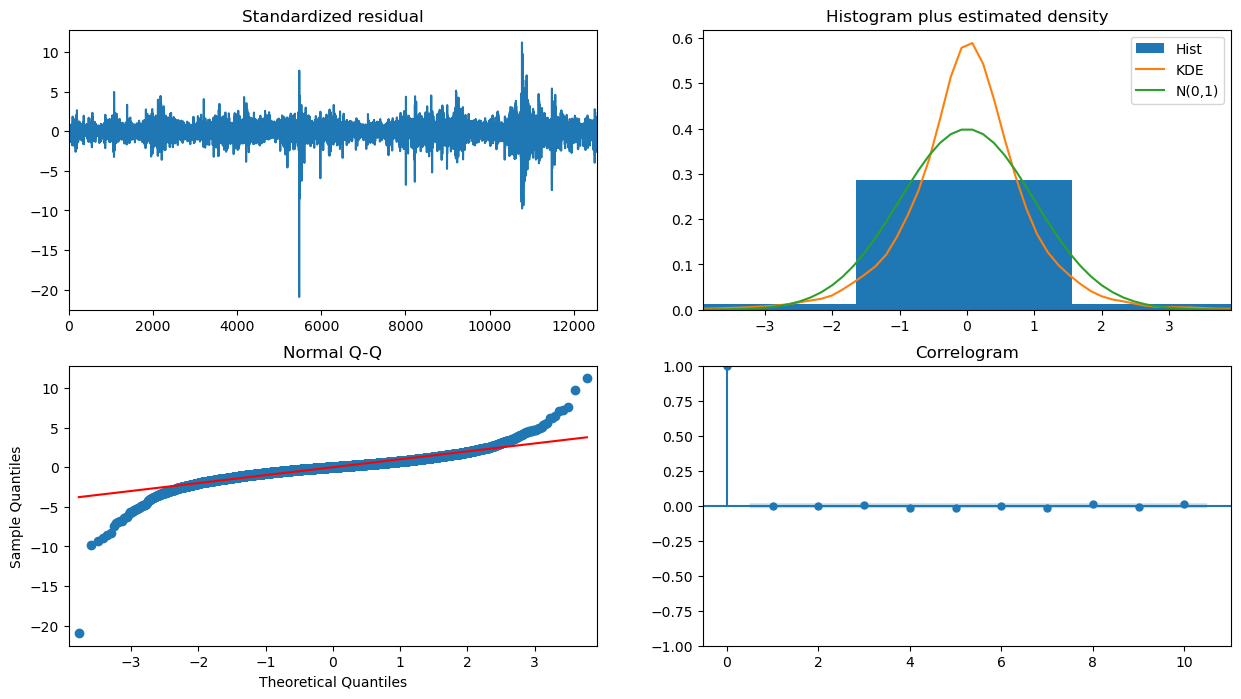

In [16]:

model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       
                      max_p=3, max_q=3, 
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

**a.Standardized residual-** It implies that the residual errors fluctuate around the mean zero, that means low variance.

**b. Histogram Density Plot-** This shows that the data points are normally distributed.

**c. Normal Q-Q -** This shows the data is perfectly in line with the fit line(red line), if not then that means distribution is skewed.

**d. Correlogram-** The ACF plot shows that the residual errors are not autocorrelated. 


Now, the plots shows the model is a good fit.

So, the autoARIMA model provided the parameter values p, q and d as 2, 0 and 0 respectively for the optimal ARIMA model.

In [17]:
model = ARIMA(train_data, order=(2,0,0))  
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                12551
Model:                 ARIMA(2, 0, 0)   Log Likelihood               39862.388
Date:                Sat, 29 Apr 2023   AIC                         -79716.777
Time:                        20:23:39   BIC                         -79687.026
Sample:                             0   HQIC                        -79706.819
                              - 12551                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002   9.62e-05      2.464      0.014    4.84e-05       0.000
ar.L1          0.0486      0.004     11.721      0.000       0.040       0.057
ar.L2         -0.0334      0.003     -9.904      0.0

In [18]:
forecast = fitted.forecast(len(test_data), alpha=0.10)

In [19]:
import math

mse = mean_squared_error(test_data, forecast)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, forecast)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, forecast))
print('RMSE: '+str(rmse))

MSE: 0.00013760514210847612
MAE: 0.006955380235535012
RMSE: 0.011730521817399094


# Stock Prediction for IXIC company using ARIMA

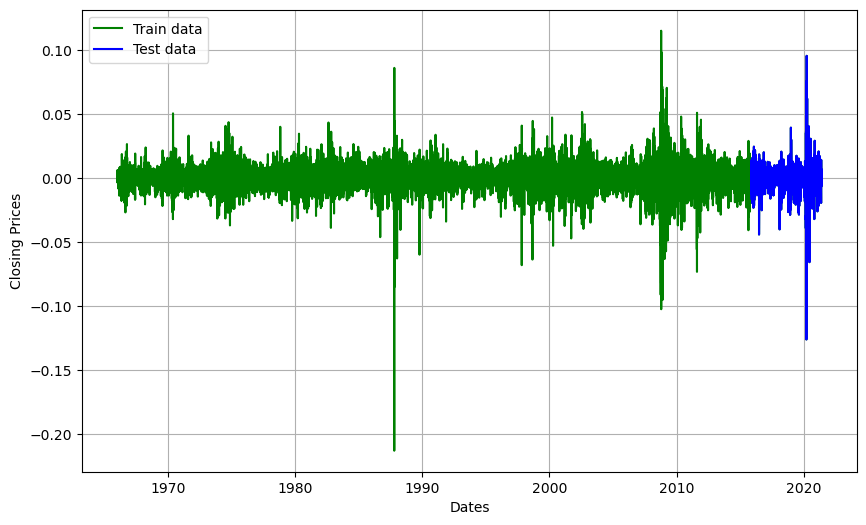

In [20]:
train_dataI, test_dataI = df_diff_IXIC2[0:int(len(df_diff_IXIC2)*0.9)], df_diff_IXIC2[int(len(df_diff_IXIC2)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_diff_NYA, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-12786.887, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-13148.221, Time=0.19 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-13189.571, Time=0.22 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-13188.653, Time=0.65 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-13189.039, Time=0.75 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-13193.040, Time=2.79 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-13196.651, Time=2.84 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-13196.625, Time=0.23 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-13194.413, Time=2.12 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-13195.638, Time=1.85 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-13197.153, Time=0.56 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-13199.288, Time=1.10 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-13219.286, Time=2.59 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-13211.410, Time=2.30 sec
 ARIM

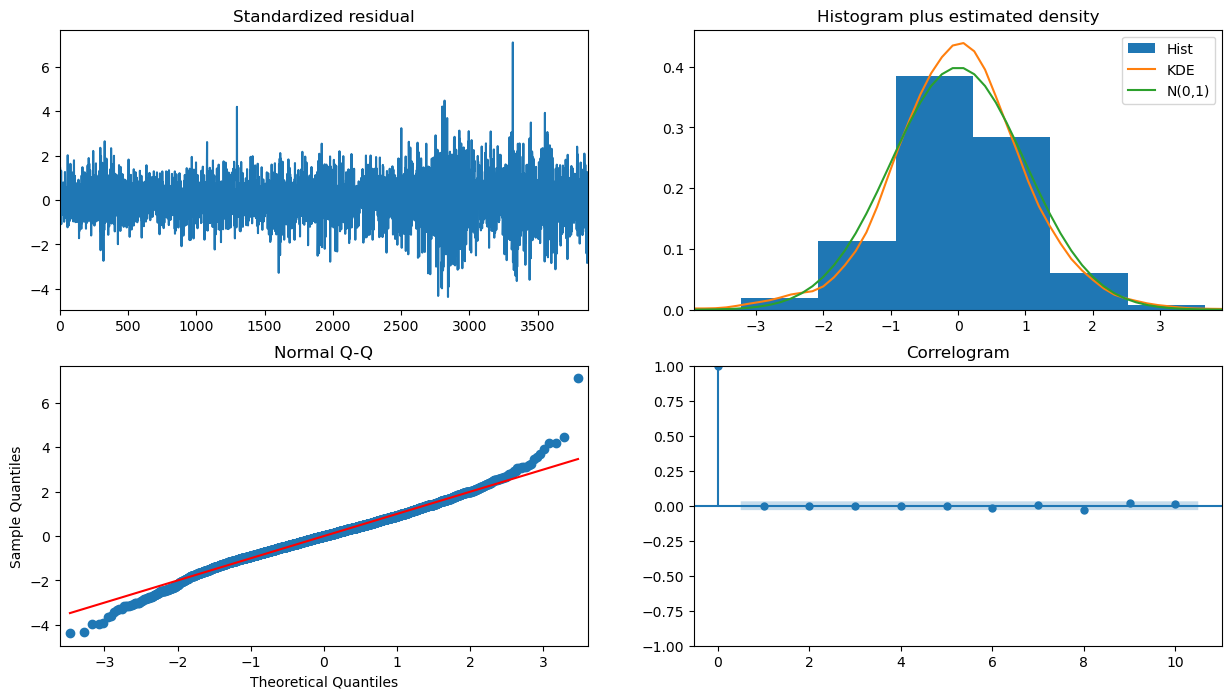

In [21]:
modelI_autoARIMA = auto_arima(train_dataI, start_p=0, start_q=0,
                      test='adf',       
                      max_p=3, max_q=3, 
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(modelI_autoARIMA.summary())
modelI_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [22]:
modelI = ARIMA(train_dataI, order=(0,0,3))  
fittedI = modelI.fit()  
print(fittedI.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3872
Model:                 ARIMA(0, 0, 3)   Log Likelihood                6614.641
Date:                Sat, 29 Apr 2023   AIC                         -13219.282
Time:                        20:24:12   BIC                         -13187.974
Sample:                             0   HQIC                        -13208.166
                               - 3872                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0024      0.001     -4.725      0.000      -0.003      -0.001
ma.L1         -0.3382      0.013    -26.234      0.000      -0.363      -0.313
ma.L2         -0.0030      0.015     -0.207      0.8

In [23]:
forecastI = fittedI.forecast(len(test_dataI), alpha=0.10)

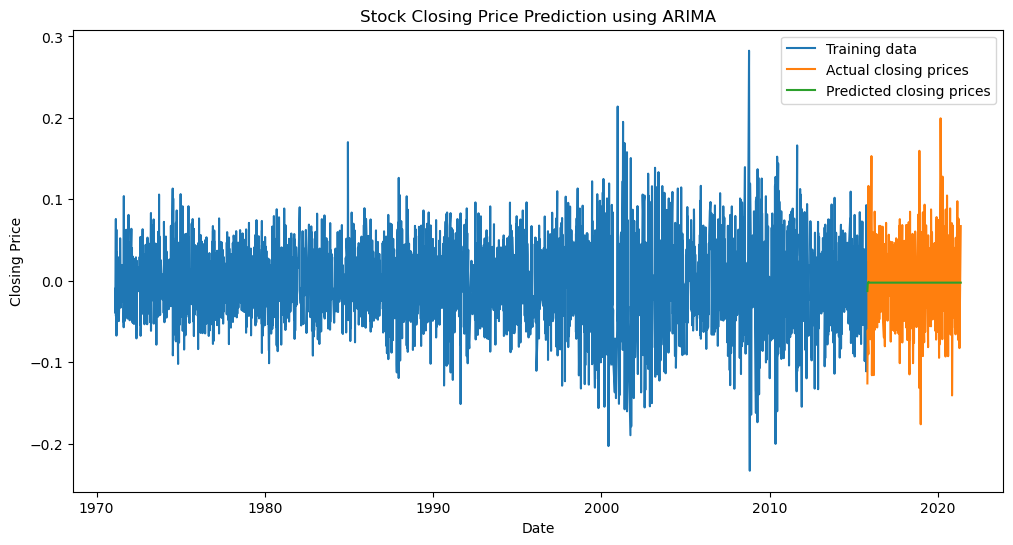

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(train_dataI, label="Training data")
plt.plot(test_dataI, label="Actual closing prices")
plt.plot(test_dataI.index, forecastI, label="Predicted closing prices")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title(f"Stock Closing Price Prediction using ARIMA")
plt.legend()
plt.show()

In [25]:
import math

mse = mean_squared_error(test_dataI, forecastI)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_dataI, forecastI)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_dataI, forecastI))
print('RMSE: '+str(rmse))

MSE: 0.0024126723886724226
MAE: 0.03894650667530371
RMSE: 0.0491189616001033
